In [1]:
from softcomputing_packages_bu import *

Importing Soft Computing Packages . . .
Copyright 2019, Seok-Jun Bu, Softcomputing Lab. All Rights Reserved.
. . . Done.


In [2]:
# Load Dataset, Fillna, Categorical
dataset = pd.read_csv('./df.csv', encoding='euc-kr')
dataset = dataset.replace([np.inf, -np.inf], np.nan)
dataset = dataset.fillna(0)
print(dataset.shape)
print(dataset)
# To Categorical
dataset_code = dataset['district']
dataset_code_cat = pd.get_dummies(dataset_code)
print(dataset_code_cat.shape)
print(dataset.shape)
dataset = pd.concat([dataset, dataset_code_cat], axis=1)
dataset = dataset.drop(columns=['district'])
print(dataset.shape)
dataset_service_code = dataset['code']
dataset_service_code_cat = pd.get_dummies(dataset_service_code)
print(dataset_service_code_cat.shape)
dataset = pd.concat([dataset, dataset_service_code], axis=1)
dataset = dataset.drop(columns=['code'])
print(dataset.shape)

(88755, 27)
       year  quarter  district      code  workpop  floatpop  prop_2030s  \
0      2018        1   1000001  CS100001    831.0  188508.0    0.409338   
1      2018        1   1000001  CS100002    831.0  188508.0    0.473122   
2      2018        1   1000001  CS100003    831.0  188508.0    0.440999   
3      2018        1   1000001  CS100004    831.0  188508.0    0.575315   
4      2018        1   1000001  CS100005    831.0  188508.0    0.503582   
...     ...      ...       ...       ...      ...       ...         ...   
88750  2018        4   1001010  CS300009     40.0  127636.0    0.178033   
88751  2018        4   1001010  CS300011     40.0  127636.0    0.161850   
88752  2018        4   1001010  CS300014     40.0  127636.0    0.547735   
88753  2018        4   1001010  CS300016     40.0  127636.0    0.283103   
88754  2018        4   1001010  CS300017     40.0  127636.0    0.568334   

       prop_06_11  prop_11_14  prop_14_17  ...  no_of_store  \
0        0.011467    0.4

In [3]:
# X, Y, Definition
Y = dataset['sales'].values
X = dataset.drop(columns=['quarter', 'year', 'sales']).values
print(X.shape, Y.shape)

(88755, 994) (88755,)


In [4]:
# Y Scaling
Y_scaled = []
Y_max, Y_min = np.max(Y), np.min(Y)
for r in range(Y.shape[0]):
    Y_scaled.append((Y[r]-Y_min)/(Y_max-Y_min))
Y_scaled = np.asarray(Y_scaled)
Y = Y_scaled

In [42]:
# Split Tr, Te
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, shuffle=True)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(62128, 994) (62128,)
(26627, 994) (26627,)


In [43]:
# Build Model
c_input = Input(shape=(X.shape[1],))
H = Reshape((X.shape[1], 1))(c_input)
H = Conv1D(filters=20, kernel_size=(2), activation='tanh', padding='same')(H)
H = MaxPool1D(2)(H)
H = Dropout(0.5)(H)
H = Conv1D(filters=20, kernel_size=(2), activation='tanh', padding='same')(H)
H = MaxPool1D(2)(H)
H = Dropout(0.5)(H)
H = Conv1D(filters=20, kernel_size=(2), activation='tanh', padding='same')(H)
H = MaxPool1D(2)(H)
H = Dropout(0.5)(H)
H = Conv1D(filters=20, kernel_size=(2), activation='tanh', padding='same')(H)
H = MaxPool1D(2)(H)
H = Dropout(0.5)(H)
H = Flatten()(H)
H = Dense(512, activation='tanh')(H)
H = Dense(128, activation='tanh')(H)
H = Dense(64, activation='tanh')(H)
c_output = Dense(1, activation='sigmoid')(H)
model_cnn = Model(c_input, c_output)
model_cnn.compile(loss='binary_crossentropy', optimizer='adam')
model_cnn.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 994)]             0         
_________________________________________________________________
reshape_4 (Reshape)          (None, 994, 1)            0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 994, 20)           60        
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 497, 20)           0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 497, 20)           0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 497, 20)           820       
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 248, 20)           0   

In [45]:
# Train, Validate Model
es = EarlyStopping(monitor='val_loss', mode='min', patience=50, restore_best_weights=True)
model_cnn.fit(X_train, Y_train, validation_data=(X_test, Y_test), shuffle=True, verbose=2, epochs=1000, batch_size=5000, callbacks=[es])

Train on 62128 samples, validate on 26627 samples
Epoch 1/1000
62128/62128 - 5s - loss: 0.1616 - val_loss: 0.0773
Epoch 2/1000
62128/62128 - 1s - loss: 0.0694 - val_loss: 0.0699
Epoch 3/1000
62128/62128 - 1s - loss: 0.0677 - val_loss: 0.0695
Epoch 4/1000
62128/62128 - 1s - loss: 0.0676 - val_loss: 0.0694
Epoch 5/1000
62128/62128 - 1s - loss: 0.0676 - val_loss: 0.0693
Epoch 6/1000
62128/62128 - 1s - loss: 0.0676 - val_loss: 0.0693
Epoch 7/1000
62128/62128 - 1s - loss: 0.0676 - val_loss: 0.0693
Epoch 8/1000
62128/62128 - 1s - loss: 0.0676 - val_loss: 0.0693
Epoch 9/1000
62128/62128 - 1s - loss: 0.0676 - val_loss: 0.0693
Epoch 10/1000
62128/62128 - 1s - loss: 0.0676 - val_loss: 0.0693
Epoch 11/1000
62128/62128 - 1s - loss: 0.0676 - val_loss: 0.0693
Epoch 12/1000
62128/62128 - 1s - loss: 0.0676 - val_loss: 0.0693
Epoch 13/1000
62128/62128 - 1s - loss: 0.0676 - val_loss: 0.0693
Epoch 14/1000
62128/62128 - 1s - loss: 0.0676 - val_loss: 0.0693
Epoch 15/1000
62128/62128 - 1s - loss: 0.0676 - v

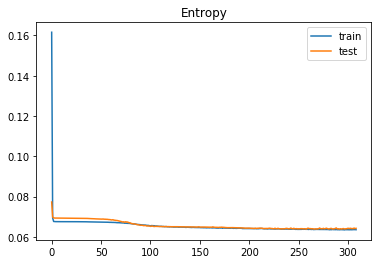

In [46]:
# Learning Curve
plot_history(model_cnn)

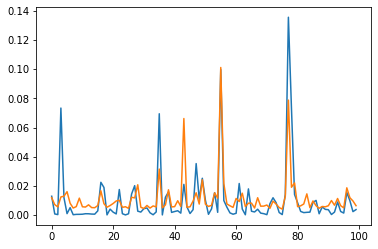

In [73]:
# Reconstructed (Test)
vis_range = 100
vis_start = np.random.randint(X_test.shape[0])
Y_test_hat = model_cnn.predict(X_test, batch_size=4000)
plt.plot(Y_test[vis_start:vis_start+vis_range])
plt.plot(Y_test_hat[vis_start:vis_start+vis_range])
plt.show()

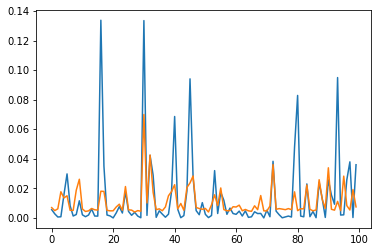

In [68]:
# Reconstructed (Train)
vis_range = 100
vis_start = np.random.randint(X_train.shape[0])
Y_train_hat = model_cnn.predict(X_train, batch_size=4000)
plt.plot(Y_train[vis_start:vis_start+vis_range])
plt.plot(Y_train_hat[vis_start:vis_start+vis_range])
plt.show()